<a href="https://colab.research.google.com/github/PyBlin/Study/blob/main/pd_Visualize/pd_plot02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 3.Plotting with missing data

* pandas 는 결측치가 포함된 그래프를 그릴 때 실용적입니다. 그래프 형태별로 결측치가 삭제되고, 그대로 남으며, 다른 값으로 채워집니다.

    * Line : 그대로
    * Line(stacked) : 0
    * Bar : 0
    * Scatter : 삭제
    * Histogram : 삭제
    * Box : 삭제
    * Area : 0
    * KDE : 삭제
    * Hexbin : 삭제
    * Pie : 0

# 4.Plotting tools

## 4.1 Scatter matrix plot

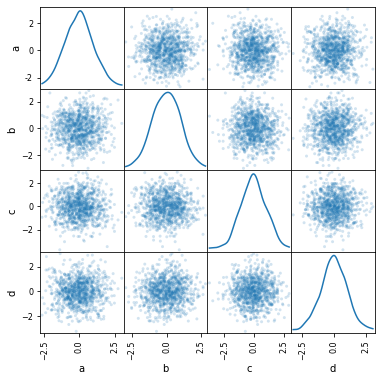

In [2]:
from pandas.plotting import scatter_matrix

df = pd.DataFrame(np.random.randn(1000,4), columns=['a','b','c','d'])
scatter_matrix(df, alpha=0.2, figsize=(6,6), diagonal='kde');

* `diagonal='kde'` : 대각선을 KDE로 그려줍니다.
* Kernel Density Estimation : 커널밀도추정

## 4.2 Density plot

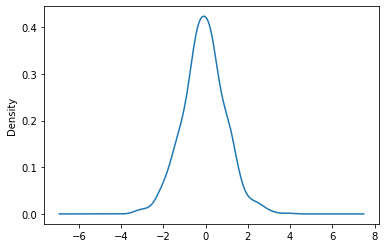

In [3]:
s = pd.Series(np.random.randn(1000))
s.plot.kde();

## 4.3 Andrews curves

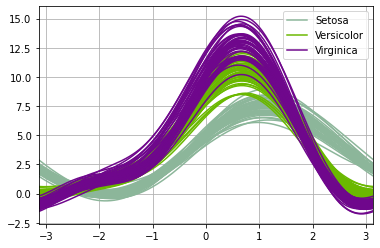

In [4]:
from pandas.plotting import andrews_curves

data = pd.read_csv('/content/iris.csv')
andrews_curves(data, 'variety');

* 앤드류 곡선으로 다변량의 데이터를 푸리에 시리즈 그래프로 그릴 수 있습니다.
* 각 클래스에 대한 곡선의 색상을 다르게 함으로써 데이터 클러스터링을 시각화합니다.
* 같은 클래스에 속할 수록 곡선은 더 가깝고 더 커집니다.

## 4.4 Parallel coordinates

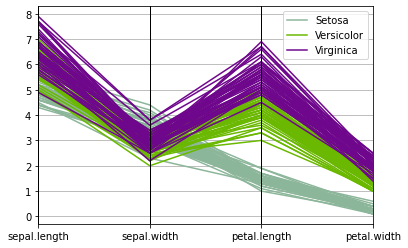

In [5]:
from pandas.plotting import parallel_coordinates

data = pd.read_csv('/content/iris.csv')
parallel_coordinates(data, 'variety');

* 평행좌표(Parallel coordinates)로 다변량의 데이터 그래프를 그릴 수 있습니다.
* 점이 아닌, 연결된 하나의 선분이 하나의 데이터를 의미합니다.
* 클러스터링되는 경향이 있는 포인트는 서로 더 가깝게 나타납니다.

## 4.5 Lag plot

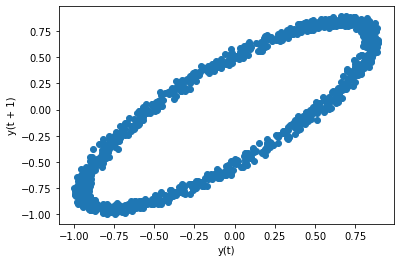

In [6]:
from pandas.plotting import lag_plot

spacing = np.linspace(-99*np.pi, 99*np.pi, num=1000)
data = pd.Series(-0.1*np.random.rand(1000) + 0.9*np.sin(spacing))
lag_plot(data);

* 시차 플롯 (lag plot) 은 데이터셋 또는 시계열이 랜덤인지 확인할 때 사용됩니다.
* 랜덤 데이터는 시차 플롯에 모양을 나타내지 않아야 합니다.
* 먄약 특정 형태가 나타난다면 랜덤 데이터가 아닙니다.
* `lag` : 1일 때 data[:-1] vs data[1:]

## 4.6 Autocorrelation plot

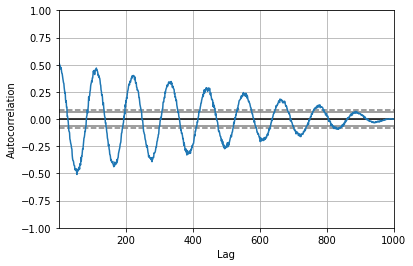

In [7]:
from pandas.plotting import autocorrelation_plot

spacing = np.linspace(-9*np.pi, 9*np.pi, num=1000)
data = pd.Series(0.7*np.random.rand(1000) + 0.3*np.sin(spacing))
autocorrelation_plot(data);

* 자동(자기)상관 그래프는 시계열 랜덤을 확인할 때 사용됩니다.
* 다양한 시간지연에서 데이터값에 대한 자기상관을 계산합니다.
* 만약 시계열이 랜덤이라면 모든 시차 분리에 대해 거의 0 이어야 합니다.
* 표시된 수평선은 95%~99% 신뢰 대역에 해당합니다.

## 4.7 Bootstrap plot

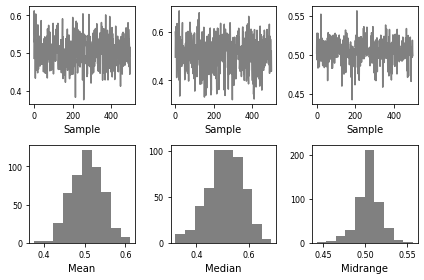

In [8]:
from pandas.plotting import bootstrap_plot

data = pd.Series(np.random.rand(1000))
bootstrap_plot(data, size=50, samples=500, color='gray');

* bootstrap 플롯은 평균값, 중앙값, 중간값 등을 시각화할 때 사용됩니다.
* subset에서 지정된 크기로 데이터셋을 선택하고 subset으로 수행합니다.
* 결과 플롯과 히스토그램은 bootstrap의 구성일 뿐입니다.

## 4.8 RadViz

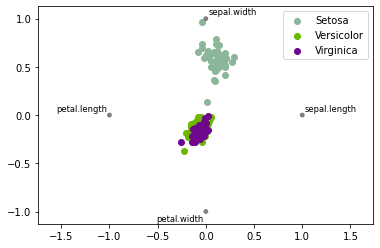

In [9]:
from pandas.plotting import radviz

data = pd.read_csv('/content/iris.csv')
radviz(data, 'variety');

* RadViz는 다변량 데이터를 시각화할 수 있습니다.
* 보이지 않는 단위 원의 중심으로부터 각 컬럼이 균일한 거리로 할당됩니다.
* 각 샘플이 해당하는 수치 값에 비례하여 점으로 표시됩니다.
* 샘플이 속한 클래스에 따라 색상이 달라집니다.